In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing
import sklearn.svm
import plotly

In [2]:
nonlin = pd.read_csv("C:\\Users\\intor\\Downloads\\Concrete_Data_Yeh.csv")

In [4]:
X=nonlin.iloc[:, 1:].values
Y=nonlin.iloc[:, 1:2].values

In [5]:
scaler = sklearn.preprocessing.MinMaxScaler()
x=scaler.fit_transform(X)
y=scaler.fit_transform(Y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
svr_rbf = sklearn.svm.SVR(kernel='rbf')
svr_lin = sklearn.svm.SVR(kernel='linear')
svr_pol = sklearn.svm.SVR(kernel='poly')
svr_sig = sklearn.svm.SVR(kernel='sigmoid')

In [7]:
svr_rbf.fit(X_train, y_train.ravel())
svr_lin.fit(X_train, y_train.ravel())
svr_pol.fit(X_train, y_train.ravel())
svr_sig.fit(X_train, y_train.ravel())

SVR(kernel='sigmoid')

In [8]:
import sklearn.metrics
y_pred_rbf=svr_rbf.predict(X_test)
y_pred_lin=svr_lin.predict(X_test)
y_pred_pol=svr_pol.predict(X_test)
y_pred_sig=svr_sig.predict(X_test)


mae_rbf=sklearn.metrics.mean_absolute_error(y_test,y_pred_rbf)
mae_lin=sklearn.metrics.mean_absolute_error(y_test,y_pred_lin)
mae_pol=sklearn.metrics.mean_absolute_error(y_test,y_pred_pol)
mae_sig=sklearn.metrics.mean_absolute_error(y_test,y_pred_sig)

mse_rbf=sklearn.metrics.mean_squared_error(y_test,y_pred_rbf)
mse_lin=sklearn.metrics.mean_squared_error(y_test,y_pred_lin)
mse_pol=sklearn.metrics.mean_squared_error(y_test,y_pred_pol)
mse_sig=sklearn.metrics.mean_squared_error(y_test,y_pred_sig)


r2_rbf=sklearn.metrics.r2_score(y_test,y_pred_rbf)
r2_lin=sklearn.metrics.r2_score(y_test,y_pred_lin)
r2_pol=sklearn.metrics.r2_score(y_test,y_pred_pol)
r2_sig=sklearn.metrics.r2_score(y_test,y_pred_sig)


evaluations_df = pd.DataFrame({
    'Model': ['RBF', 'Linear', 'Polynomial','Sigmoid'],
    'MAE': [mae_rbf, mae_lin, mae_pol, mae_sig],
    'MSE': [mse_rbf, mse_lin, mse_pol, mse_sig],
    'R2': [r2_rbf, r2_lin, r2_pol, r2_sig]
})

print(evaluations_df)

        Model       MAE        MSE          R2
0         RBF  0.050502   0.003381    0.937226
1      Linear  0.052933   0.003722    0.930884
2  Polynomial  0.049376   0.003033    0.943674
3     Sigmoid  2.944509  14.575721 -269.655970


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svr = sklearn.svm.SVR()

grid_search_svrl = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_svrl.fit(X_train, y_train.ravel())

best_score = -grid_search_svrl.best_score_
print(f'Best Cross-Validated Score: {best_score}')

best_params = grid_search_svrl.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Cross-Validated Score: 2.1106459137494504e-05
Best Hyperparameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}


In [11]:
best_svrl = grid_search_svrl.best_estimator_

y_pred_svrl = best_svrl.predict(X_test)

mae_svrl = sklearn.metrics.mean_absolute_error(y_test, y_pred_svrl)
mse_svrl = sklearn.metrics.mean_squared_error(y_test, y_pred_svrl)
r2_svrl = sklearn.metrics.r2_score(y_test, y_pred_svrl)

evaluations_svrl_df = pd.DataFrame({
    'Model': ['Linear, C=1, Epsilon=0.01'],
    'MAE': [mae_svrl],
    'MSE': [mse_svrl],
    'R2': [r2_svrl]
})


print(evaluations_svrl_df)

                       Model       MAE       MSE        R2
0  Linear, C=1, Epsilon=0.01  0.003015  0.000015  0.999729


In [12]:
from sklearn.linear_model import SGDRegressor

param_grid = {
    'loss': ['squared_epsilon_insensitive', 'huber', 'epsilon_insensitive'],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

sgd = SGDRegressor(max_iter=5000)

grid_search_sgd = GridSearchCV(sgd, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_sgd.fit(X_train, y_train.ravel())

best_score = -grid_search_sgd.best_score_
print(f'Best Cross-Validated Score: {best_score}')

best_params = grid_search_sgd.best_params_
print(f'Best Hyperparameters: {best_params}')

best_sgd = grid_search_sgd.best_estimator_

y_pred_sgd = best_sgd.predict(X_test)

C:\Users\intor\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\intor\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\intor\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\intor\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\intor\anaconda3\Lib\site-packages\sklearn\linea

Best Cross-Validated Score: 0.0001236755164353539
Best Hyperparameters: {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'huber', 'penalty': None}


In [13]:
mae_sgd = sklearn.metrics.mean_absolute_error(y_test, y_pred_sgd)
mse_sgd = sklearn.metrics.mean_squared_error(y_test, y_pred_sgd)
r2_sgd = sklearn.metrics.r2_score(y_test, y_pred_sgd)

evaluations_sgd_df = pd.DataFrame({
    'Model': ['SGDRegressor'],
    'MAE': [mae_sgd],
    'MSE': [mse_sgd],
    'R2': [r2_sgd]
})

print(evaluations_sgd_df)

          Model       MAE           MSE   R2
0  SGDRegressor  0.000053  4.173497e-09  1.0


In [14]:
import xgboost as xgb

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

xg_reg = xgb.XGBRegressor()

grid_search_xgb = GridSearchCV(xg_reg, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_xgb.fit(X_train, y_train.ravel())

best_score = -grid_search_xgb.best_score_
print(f'Best Cross-Validated Score: {best_score}')

best_params = grid_search_xgb.best_params_
print(f'Best Hyperparameters: {best_params}')

best_xg_reg = grid_search_xgb.best_estimator_

y_pred_xgb = best_xg_reg.predict(X_test)

Best Cross-Validated Score: 0.00040994913465364213
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [15]:
mae_xgb = sklearn.metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = sklearn.metrics.mean_squared_error(y_test, y_pred_xgb)
r2_xgb = sklearn.metrics.r2_score(y_test, y_pred_xgb)

evaluations_xgb = pd.DataFrame({
    'Model': ['XGBoost'],
    'MAE': [mae_xgb],
    'MSE': [mse_xgb],
    'R2': [r2_xgb]
})

print(evaluations_xgb)

     Model       MAE           MSE        R2
0  XGBoost  0.000209  2.800708e-07  0.999995


In [16]:
from sklearn.linear_model import LinearRegression

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
}

lr = LinearRegression()

grid_search_lm = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lm.fit(X_train, y_train.ravel())

best_score = -grid_search_lm.best_score_
print(f'Best Cross-Validated Score: {best_score}')

best_params = grid_search_lm.best_params_
print(f'Best Hyperparameters: {best_params}')

best_lr = grid_search_lm.best_estimator_

y_pred_lr = best_lr.predict(X_test)

mae_lr = sklearn.metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = sklearn.metrics.mean_squared_error(y_test, y_pred_lr)
r2_lr = sklearn.metrics.r2_score(y_test, y_pred_lr)

evaluations_lr_df = pd.DataFrame({
    'Model': ['LinearRegression'],
    'MAE': [mae_lr],
    'MSE': [mse_lr],
    'R2': [r2_lr]
})


print(evaluations_lr_df)

Best Cross-Validated Score: 5.51935408343408e-32
Best Hyperparameters: {'copy_X': True, 'fit_intercept': True}
              Model           MAE           MSE   R2
0  LinearRegression  1.927791e-16  5.874174e-32  1.0


In [18]:
pd.concat([evaluations_df,evaluations_svrl_df,evaluations_sgd_df,evaluations_xgb,evaluations_lr_df],ignore_index=True)

,Model,MAE,MSE,R2
0,RBF,5.050247e-02,3.380608e-03,0.937226
1,Linear,5.293315e-02,3.722099e-03,0.930884
2,Polynomial,4.937643e-02,3.033324e-03,0.943674
3,Sigmoid,2.944509e+00,1.457572e+01,-269.655970
4,"Linear, C=1, Epsilon=0.01",3.014755e-03,1.461557e-05,0.999729
5,SGDRegressor,5.347197e-05,4.173497e-09,1.000000
6,XGBoost,2.089630e-04,2.800708e-07,0.999995
7,LinearRegression,1.927791e-16,5.874174e-32,1.000000


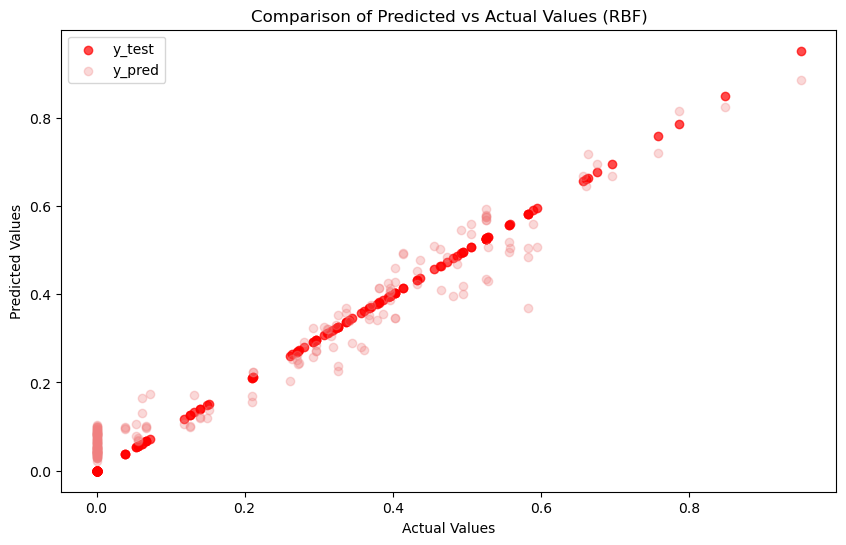

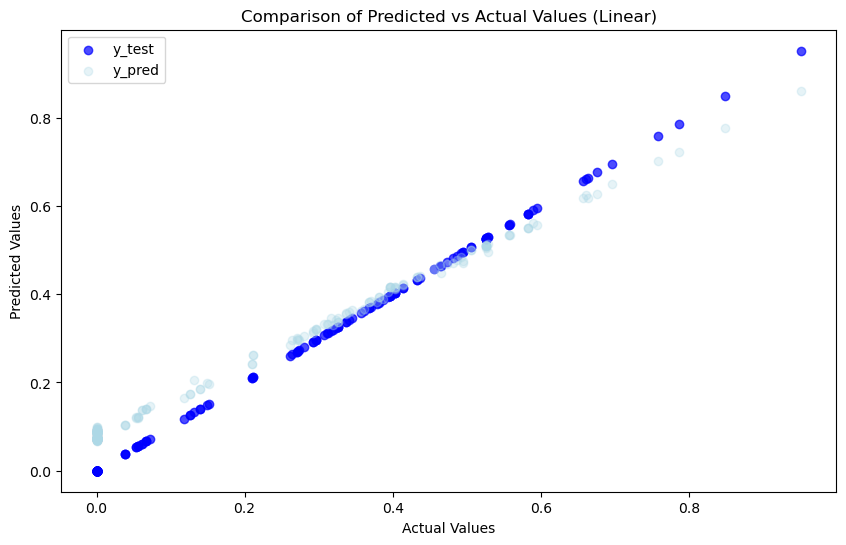

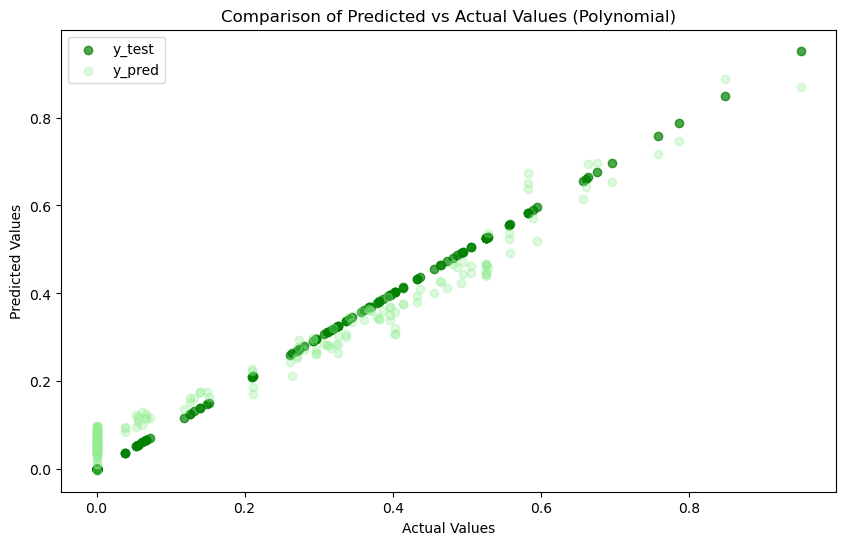

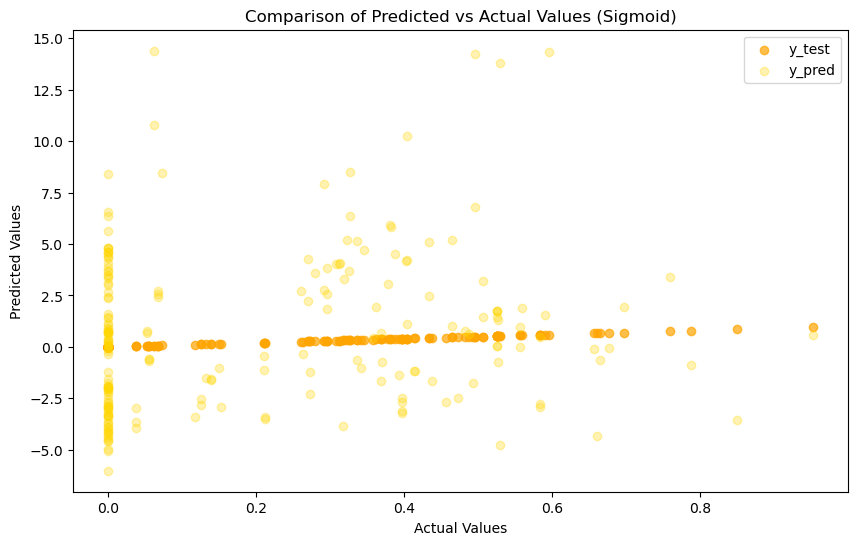

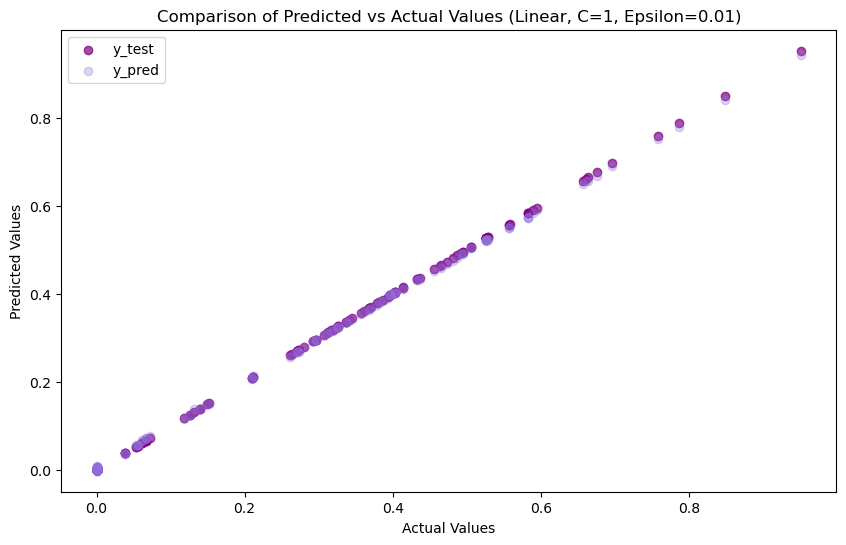

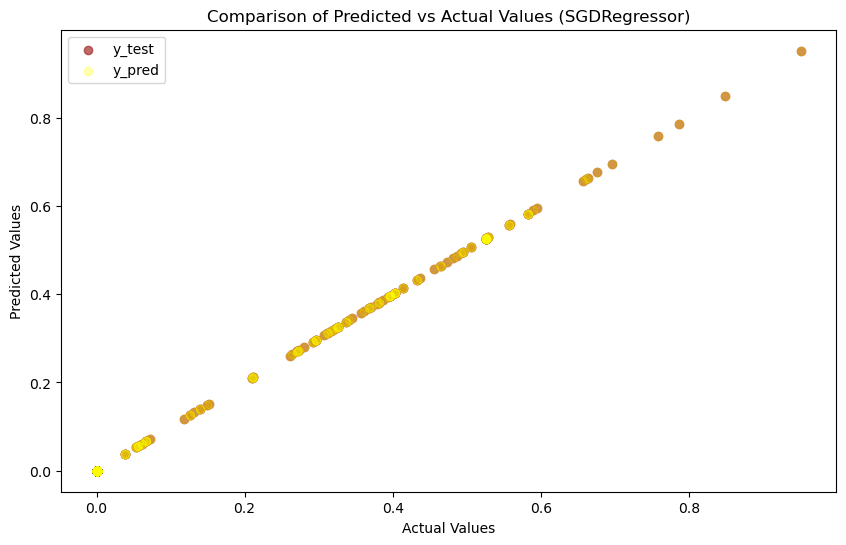

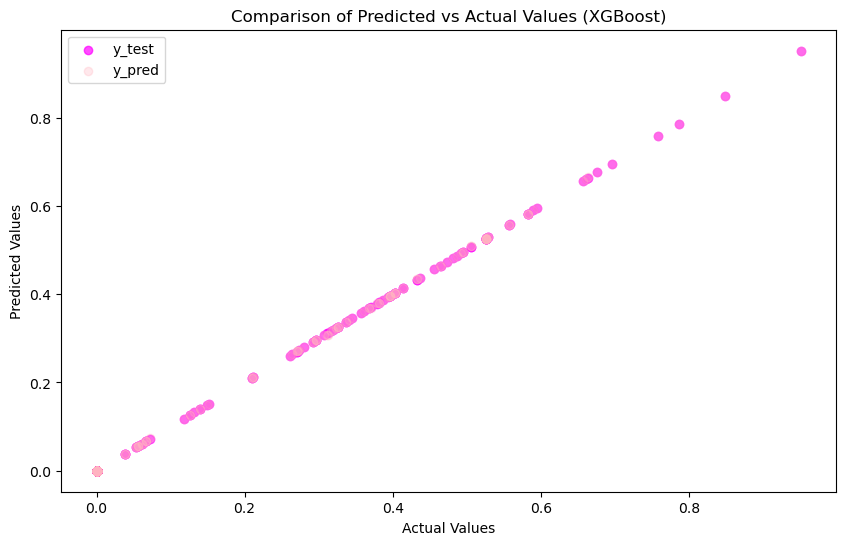

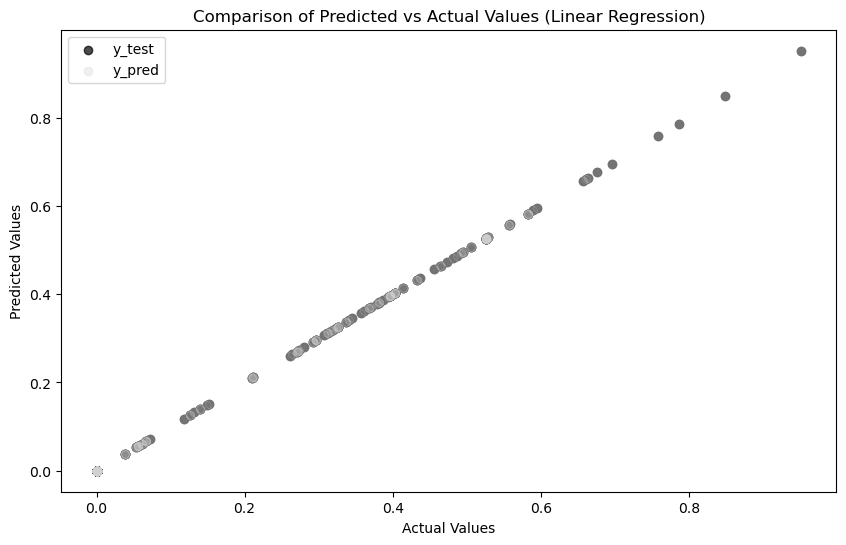

In [32]:
import matplotlib.pyplot as plt

# List of predicted values
y_preds = [y_pred_rbf, y_pred_lin, y_pred_pol, y_pred_sig, y_pred_svrl, y_pred_sgd, y_pred_xgb, y_pred_lr]

# List of model names for legend
model_names = ['RBF', 'Linear', 'Polynomial', 'Sigmoid', 'Linear, C=1, Epsilon=0.01', 'SGDRegressor', 'XGBoost', 'Linear Regression']

# Define a list of colors for y_test and y_pred
test_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'magenta', 'black']
pred_colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold', 'mediumpurple', 'yellow', 'lightpink', 'lightgray']

# Create 8 separate scatter plots
for i, y_pred in enumerate(y_preds):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test, color=test_colors[i], alpha=0.7, label='y_test')
    plt.scatter(y_test, y_pred, color=pred_colors[i], alpha=0.3, label='y_pred')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Comparison of Predicted vs Actual Values ({model_names[i]})')
    plt.legend()
    plt.show()
